In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [4]:
dataset_train.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [5]:
training_set = dataset_train.iloc[:,1:2].values

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
X_train = []
y_train = []

In [9]:
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LSTM
from keras.layers import Dropout

In [13]:
regressor = Sequential()

In [14]:
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 1)))

In [15]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(Dense(units=1))

In [18]:
regressor.compile(optimizer = 'adam', loss='mean_squared_error')

In [19]:
regressor.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
38/38 [==============================] - 25s 86ms/step - loss: 0.0504
Epoch 2/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0052
Epoch 3/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0043
Epoch 4/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0061
Epoch 5/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0041
Epoch 6/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0043
Epoch 7/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0035
Epoch 9/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0034
Epoch 10/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0039
Epoch 11/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0036
Epoch 12/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0036
Epoch 13/100
38/38 [====

In [20]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [21]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

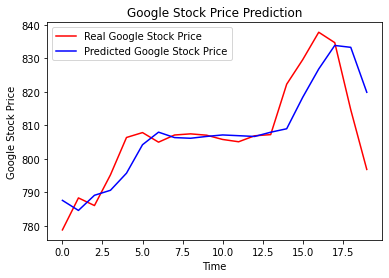

In [22]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()